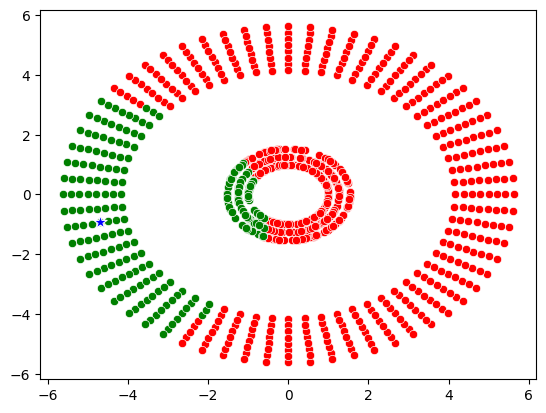

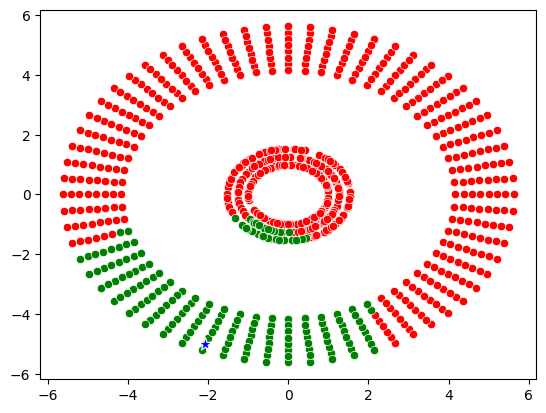

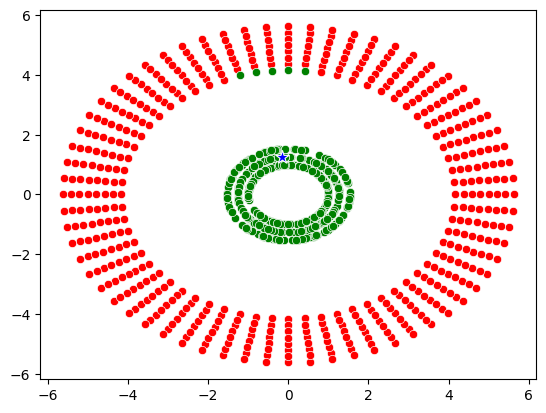

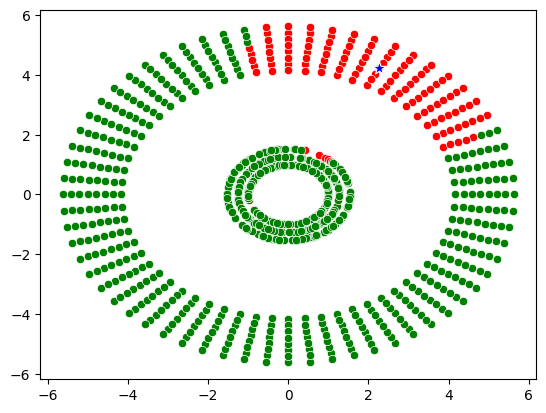

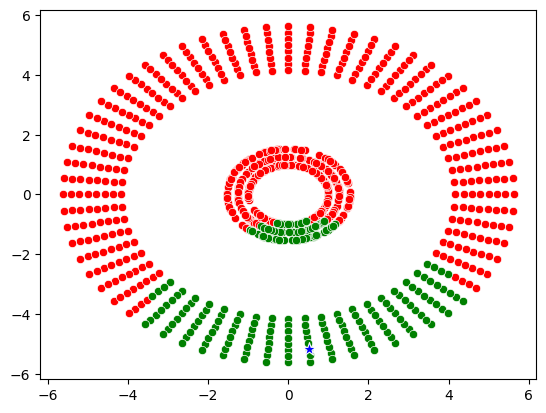

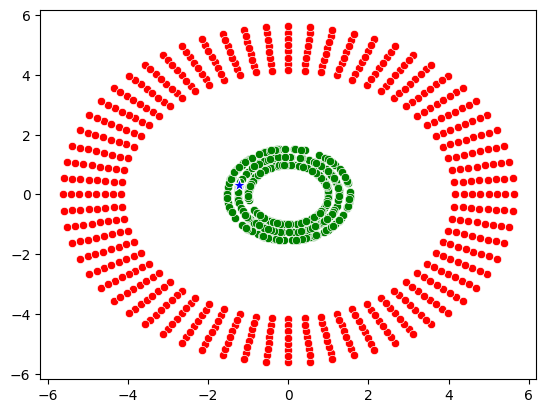

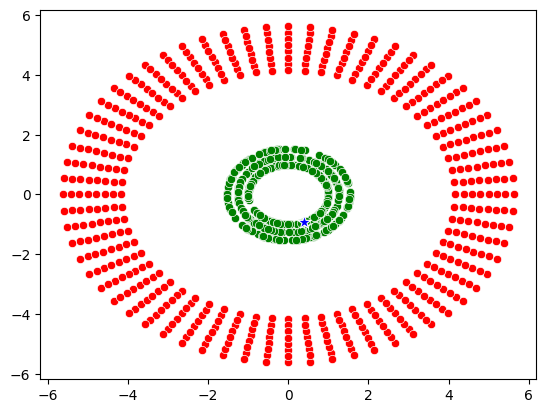

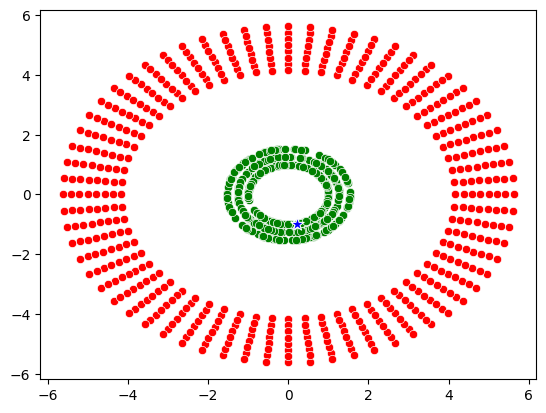

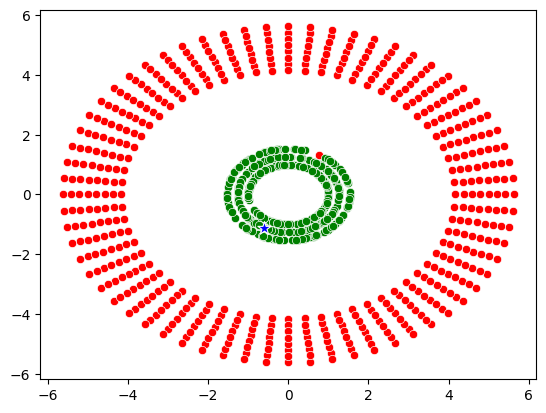

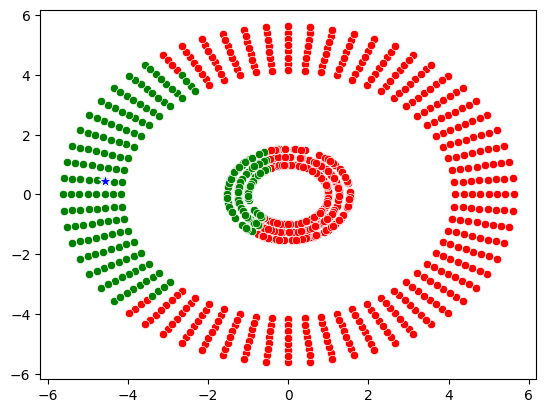

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(69)
def calculate_cluster_means(x, cluster):
    means = np.zeros((2, x.shape[1]))
    means[0, :] = np.mean(x[cluster == 0], axis=0)
    means[1, :] = np.mean(x[cluster == 1], axis=0)
    return means

def calculate_distance(x, u):
    distance = np.zeros((x.shape[0], u.shape[0]))
    for i in range(u.shape[0]):
        diff = x - u[i, :].reshape((1, -1))
        distance[:, i] = np.sum(np.square(diff), axis=1)
    return distance

def predict_cluster(x, u):
    distance = calculate_distance(x, u)
    cluster = np.argmin(distance, axis=1)
    return cluster.reshape(-1, 1)



data = np.loadtxt('./data/kmeans_data.txt')

for iteration in range(10):
    random_index = (np.random.randint(250, size=1)).reshape(())
    landmarks = np.exp(-0.1 * np.sum(np.square(data - data[random_index, :].reshape((1, -1))), axis=1)).reshape(-1, 1)

    cluster_centers = landmarks[:2, :]
    cluster_assignment = predict_cluster(landmarks, cluster_centers)

    cluster_centers = calculate_cluster_means(landmarks, cluster_assignment)
    cluster_assignment = predict_cluster(landmarks, cluster_centers)
    positive_points = (cluster_assignment == 1).reshape(cluster_assignment.shape[0])
    negative_points = (cluster_assignment == 0).reshape(cluster_assignment.shape[0])

    sns.scatterplot(x=data[positive_points, 0], y=data[positive_points, 1], color='red')
    sns.scatterplot(x=data[negative_points, 0], y=data[negative_points, 1], color='green')
    sns.scatterplot(x=[data[random_index, 0]], y=[data[random_index, 1]], color='blue', marker='*', s=100)

    # plt.savefig(f'part2land{iteration}.png')
    plt.show()


